# Задание 4. PCA, tSNE, UMAP

[1] Сгенерировать двумерные датасеты df_a (размерности 4х4, 16х16, 256х256), в которых в каждой строке х начиная с колонки y(=х) значения следующих (a/2)
ячеек равны «1» (если достигнут конец строки датасета, сверх размера датасета не заполняем, на новую строку не переходим), а оставшиеся ячейки датасета равны «0». Выполнить визуализацию датасетов в пространстве X-Y.

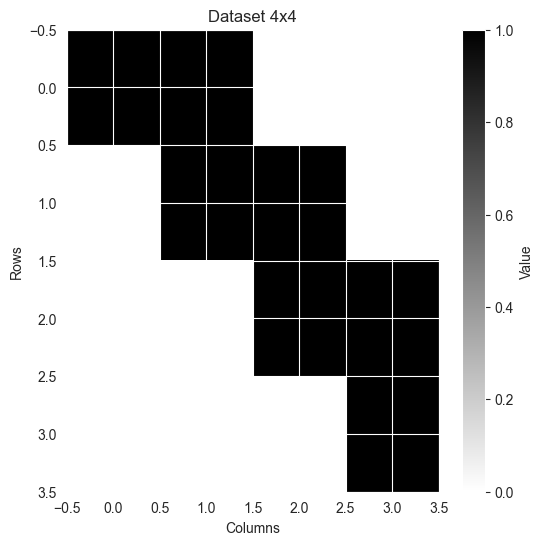

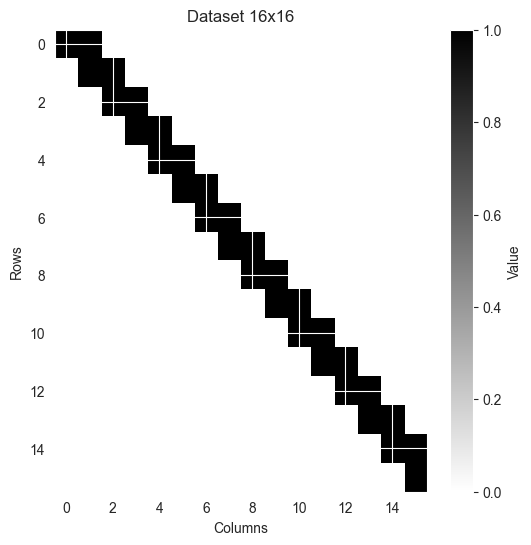

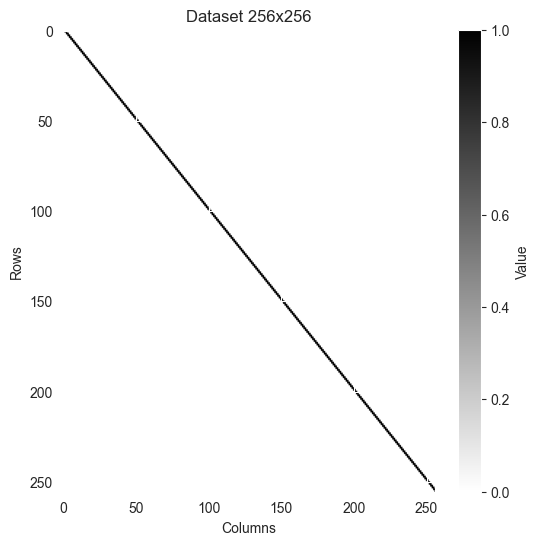

In [65]:
def generate_dataset(rows, cols, a):
    data = np.zeros((rows, cols))
    for i in range(rows):
        start = i
        end = min(start + a // 2, cols)
        data[i, start:end] = 1
    return pd.DataFrame(data)


# Генерация датасетов
df_4 = generate_dataset(4, 4, 4)
df_16 = generate_dataset(16, 16, 4)
df_256 = generate_dataset(256, 256, 4)


# Визуализация датасетов
def visualize_dataset(df, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(df, cmap='binary', aspect='auto')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()
    
# def visualize_datasets2(datasets):
#     fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))
#     for ax, (name, data) in zip(axes, datasets.items()):
#         sns.heatmap(data, ax=ax, cmap="Blues", cbar=False, square=True)
#         ax.set_title(name)
#     plt.tight_layout()
#     plt.show()


visualize_dataset(df_4, "Dataset 4x4")
visualize_dataset(df_16, "Dataset 16x16")
visualize_dataset(df_256, "Dataset 256x256")

[2] Используя метод главных компонент (основанный на корреляциях), для
каждого датасета df_a отдельно визуализировать:
- Scree plot;
- Отображения отдельных объектов-строк в двумерных пространствах первых компонент от 1 до а (а на выбор от 4 до 8) – без отображения старых векторовпеременных;
- Отображения отдельных объектов-строк в двумерных пространствах первых компонент от 1 до а (а на выбор от 4 до 8) – с отображением старых векторовпеременных.
- Отображения отдельных объектов-строк в двумерных пространствах первых компонент от c до c+а (а на выбор от 4 до 8, c – любая со 129) – без отображения старых векторов-переменных;
- Отображения отдельных объектов-строк в двумерных пространствах первых компонент от c до c+а (а на выбор от 4 до 8, c – любая со 129)– с отображением старых векторов-переменных.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Функция для выполнения PCA и визуализации
def pca_analysis_and_plot(df, n_components, show_vectors, component_range=(1, 4)):
    """
    Анализ и визуализация PCA.
    - df: входной DataFrame.
    - n_components: число компонент для PCA.
    - show_vectors: отображать ли старые векторы переменных.
    - component_range: диапазон компонент для отображения.
    """
    # Стандартизация данных
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_scaled)

    # Scree plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, marker='o')
    plt.title("Scree Plot")
    plt.xlabel("Номер компоненты")
    plt.ylabel("Доля объяснённой дисперсии")
    plt.grid()
    plt.show()

    # Визуализация объектов в пространстве компонент
    components = range(component_range[0] - 1, component_range[1])
    plt.figure(figsize=(8, 8))
    plt.scatter(pca_result[:, components[0]], pca_result[:, components[1]], c='blue', alpha=0.7, label="Объекты")

    if show_vectors:
        # Векторы старых переменных
        for i, (x, y) in enumerate(zip(pca.components_[components[0], :], pca.components_[components[1], :])):
            plt.arrow(0, 0, x * 2, y * 2, color='r', alpha=0.7)
            plt.text(x * 2, y * 2, df.columns[i], color='r', fontsize=10)

    plt.title(f"PCA: Components {component_range[0]} and {component_range[1]}")
    plt.xlabel(f"Component {component_range[0]}")
    plt.ylabel(f"Component {component_range[1]}")
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.grid()
    plt.show()

=== Анализ df_4x4 ===


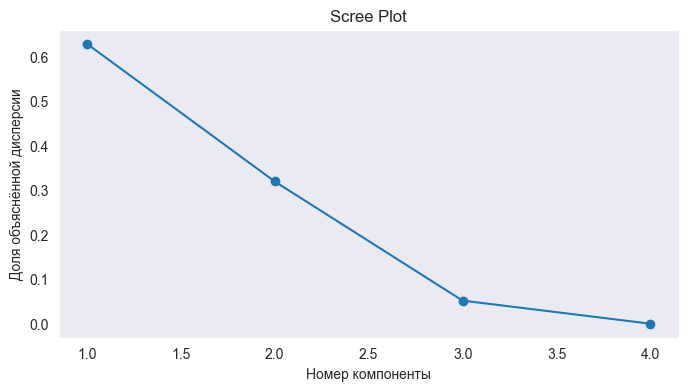

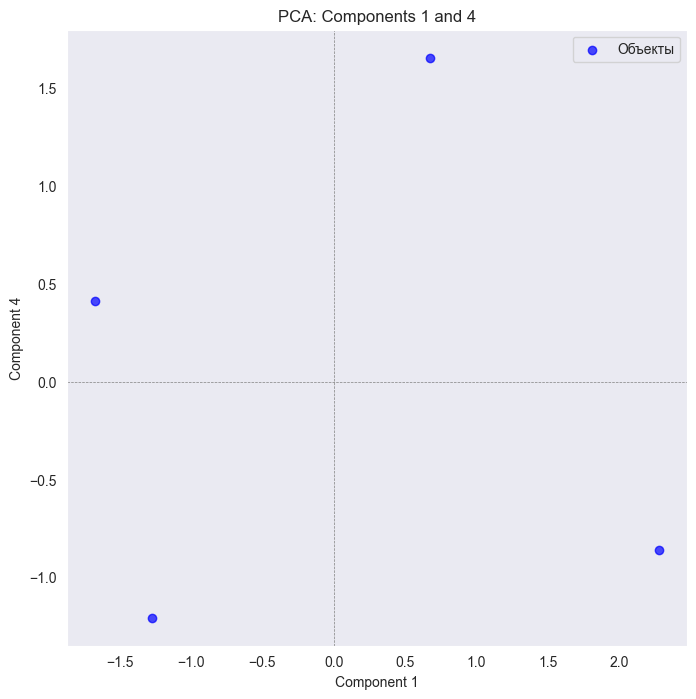

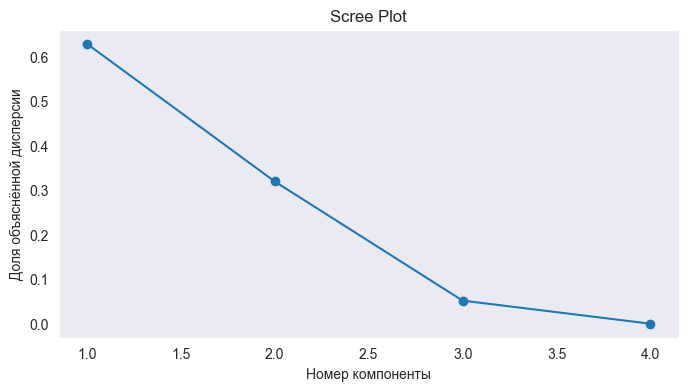

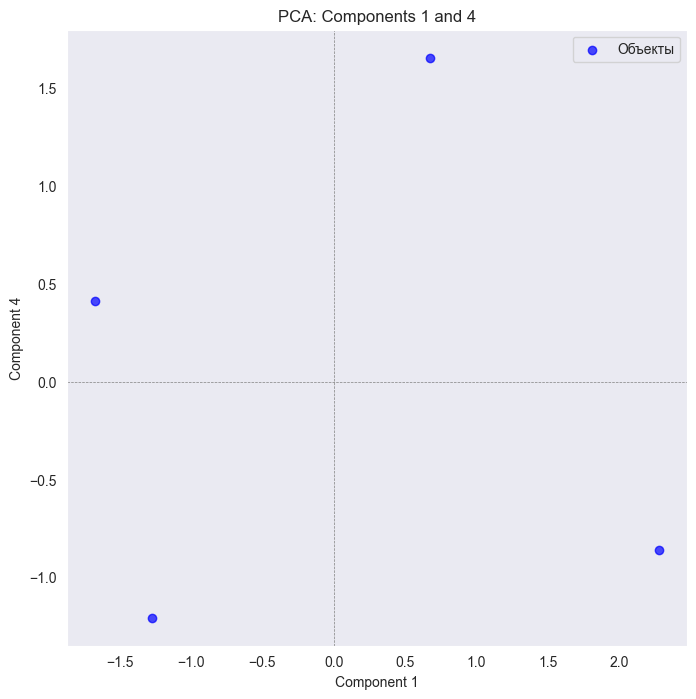

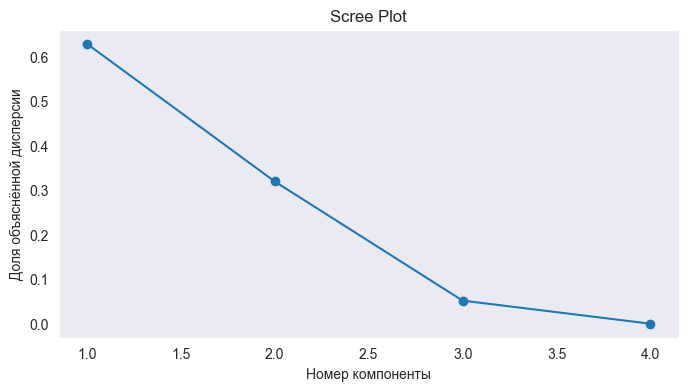

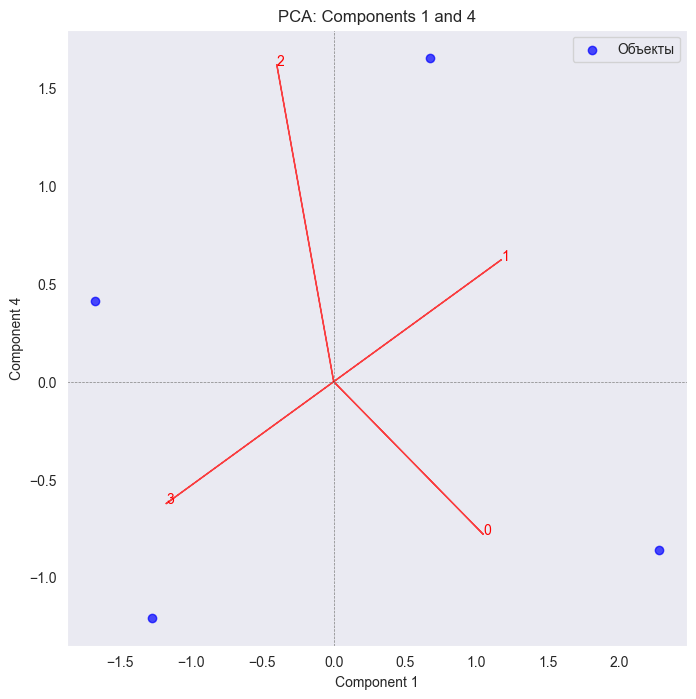

=== Анализ df_16x16 ===


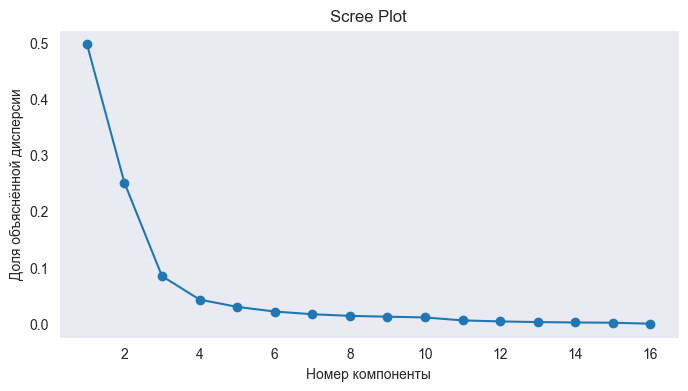

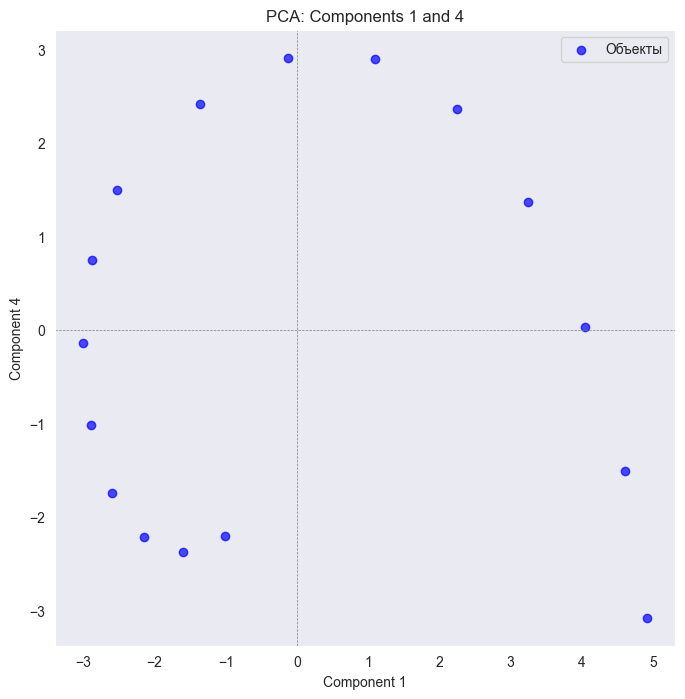

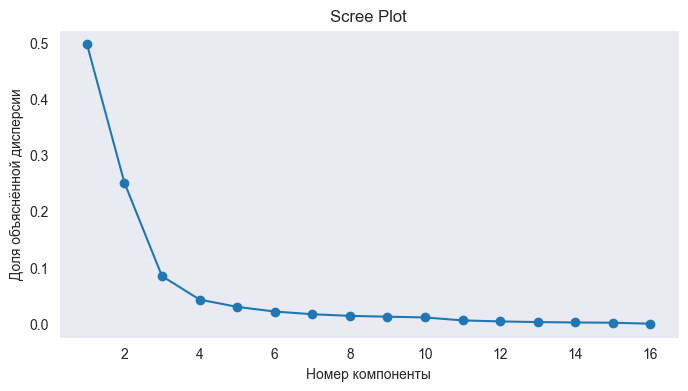

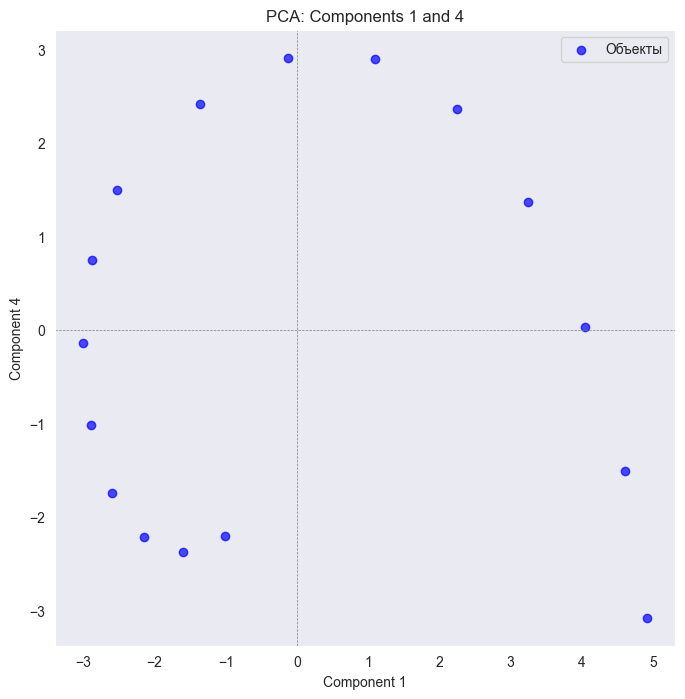

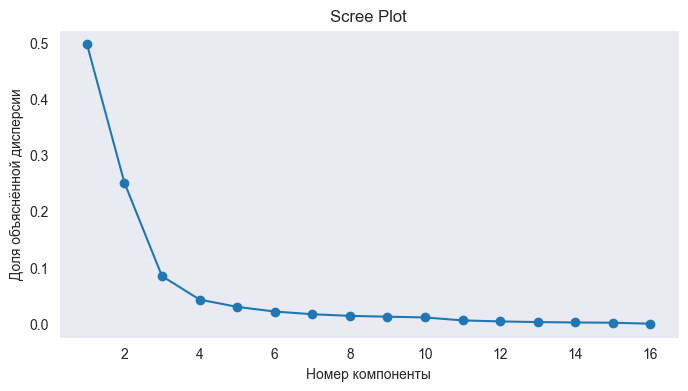

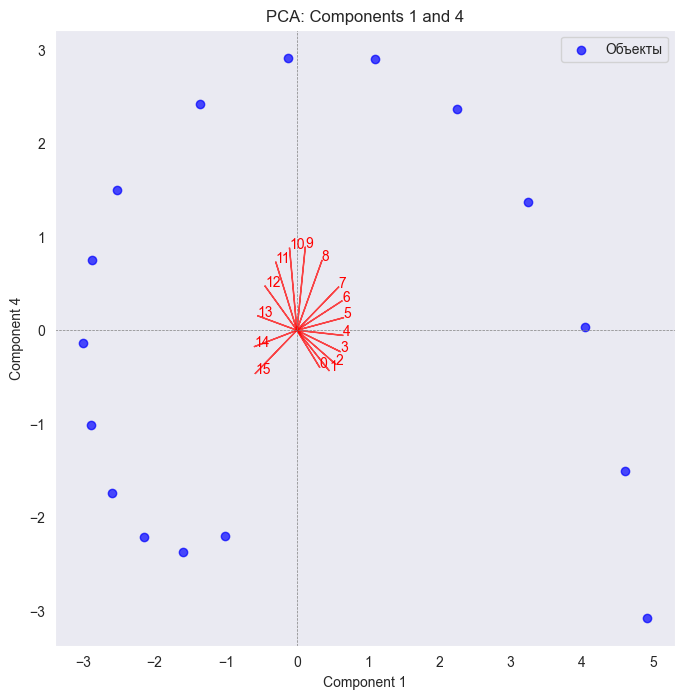

=== Анализ df_256x256 ===


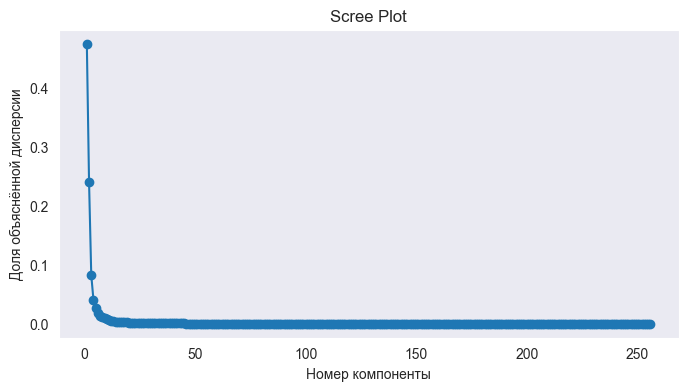

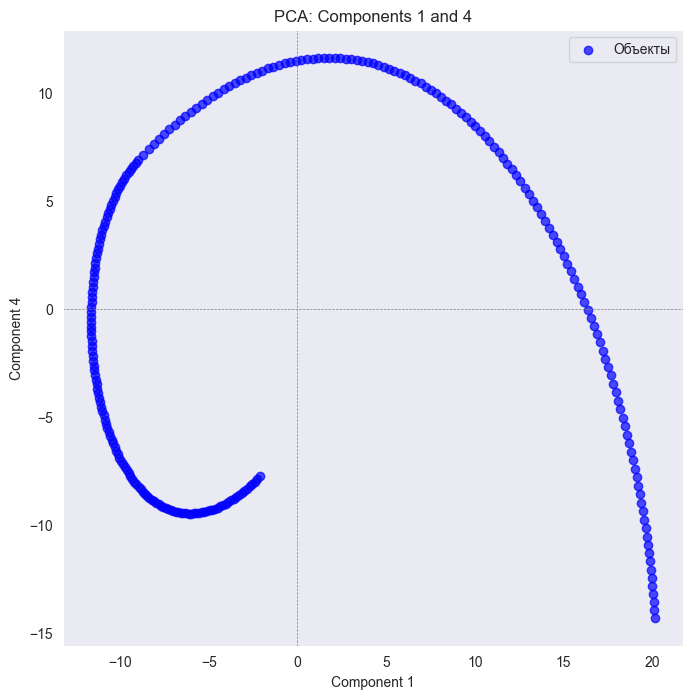

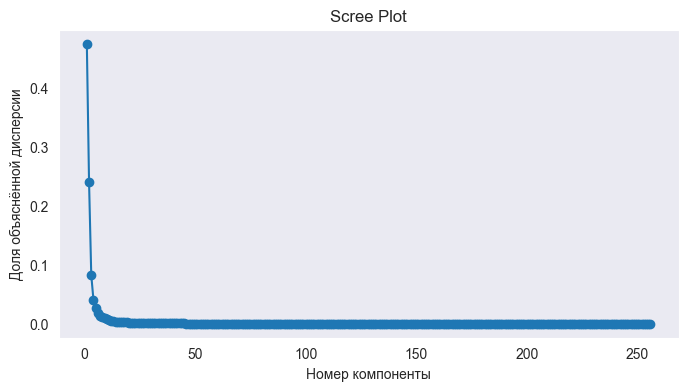

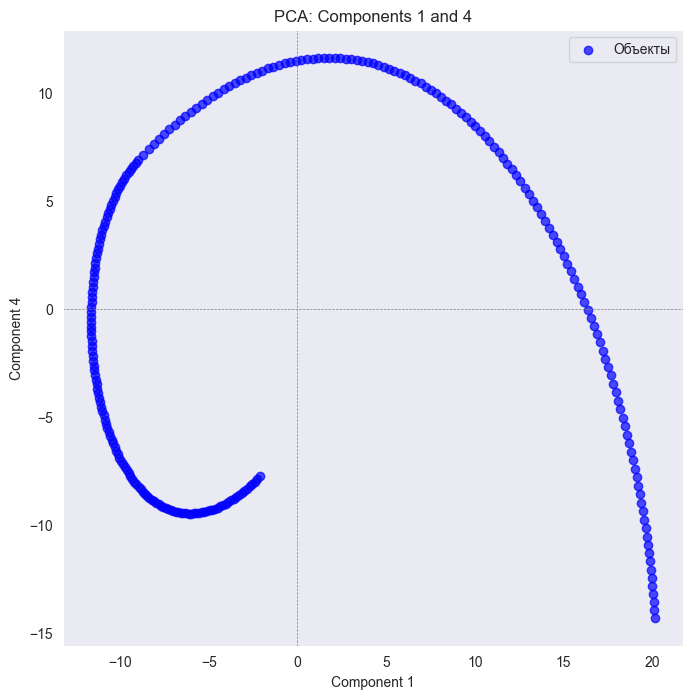

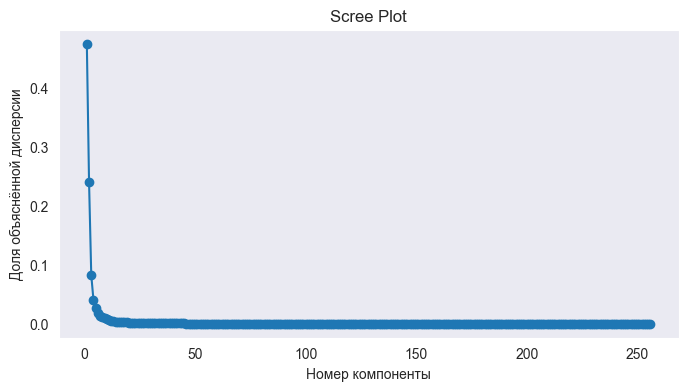

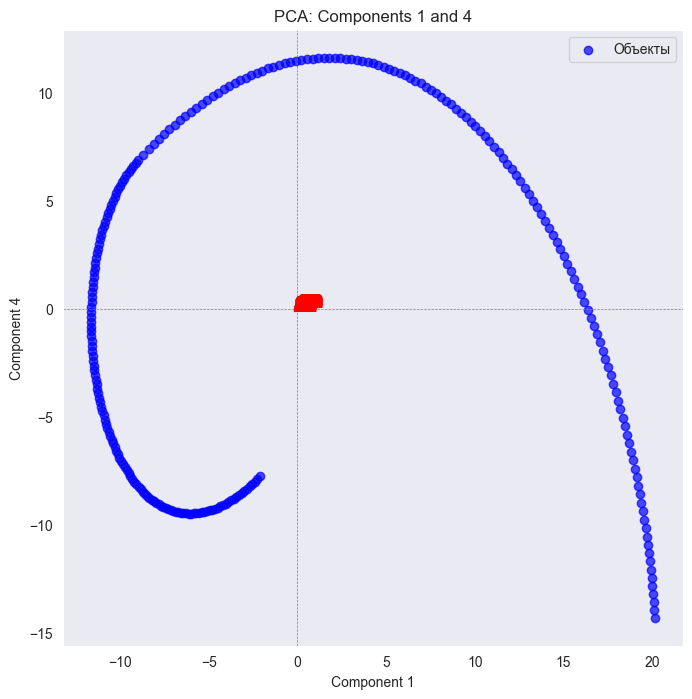

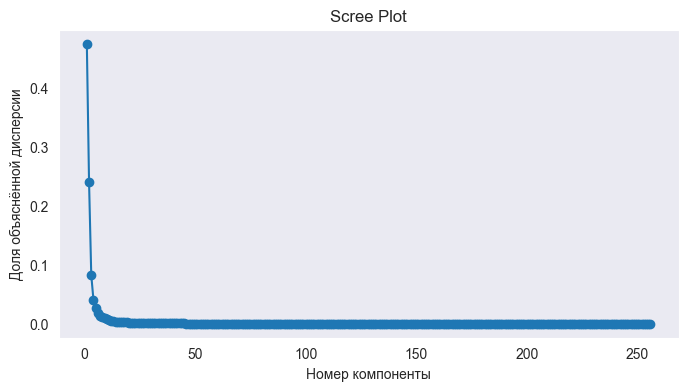

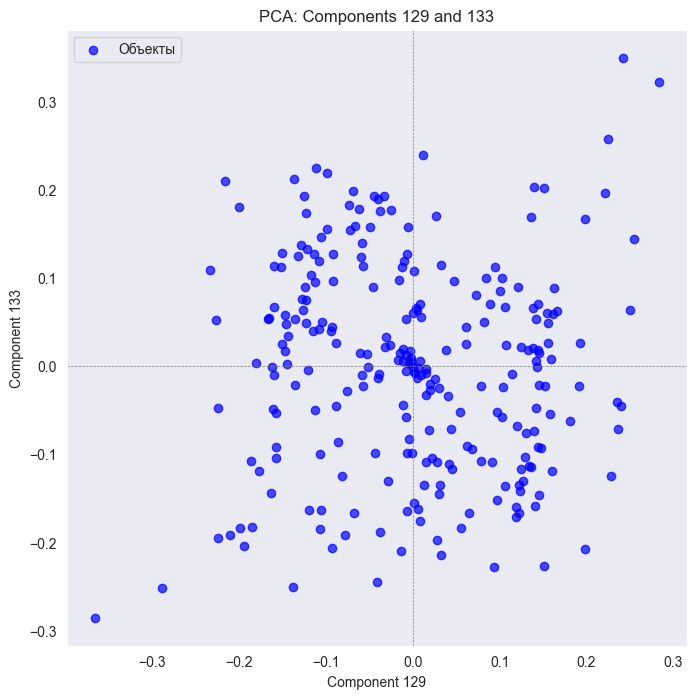

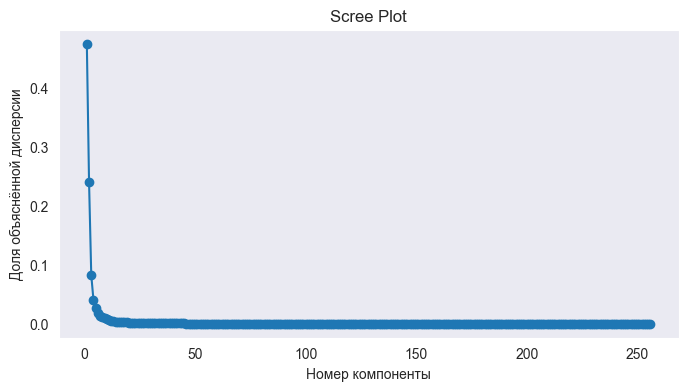

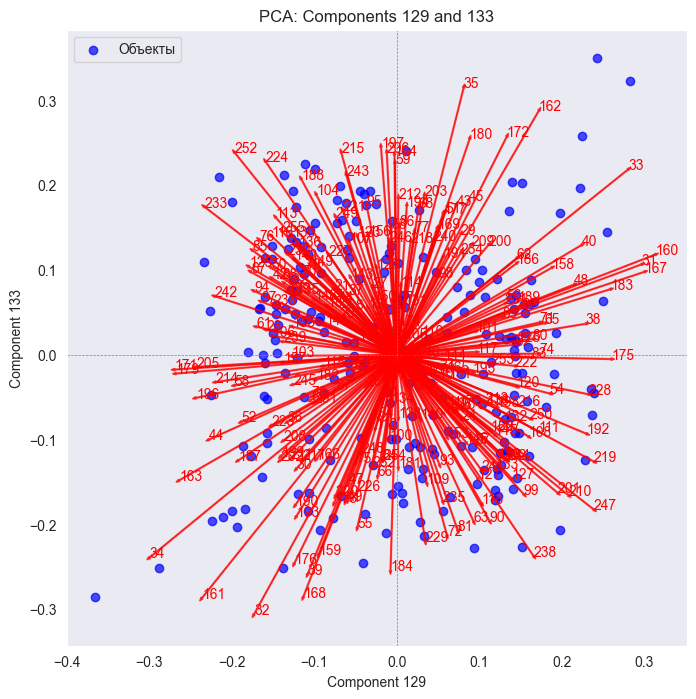

In [66]:
# Генерация датасетов
datasets = {
    "df_4x4": pd.DataFrame([[1 if i >= j and i < j + 2 else 0 for i in range(4)] for j in range(4)]),
    "df_16x16": pd.DataFrame([[1 if i >= j and i < j + 8 else 0 for i in range(16)] for j in range(16)]),
    "df_256x256": pd.DataFrame([[1 if i >= j and i < j + 128 else 0 for i in range(256)] for j in range(256)])
}

# Применение PCA для каждого датасета
for name, df in datasets.items():
    print(f"=== Анализ {name} ===")
    # Scree plot
    pca_analysis_and_plot(df, n_components=min(df.shape), show_vectors=False, component_range=(1, 4))

    # Визуализация в пространстве первых компонент (без векторов переменных)
    pca_analysis_and_plot(df, n_components=min(df.shape), show_vectors=False, component_range=(1, 4))

    # Визуализация в пространстве первых компонент (с векторами переменных)
    pca_analysis_and_plot(df, n_components=min(df.shape), show_vectors=True, component_range=(1, 4))

    # Визуализация с диапазоном c до c+a (c=129, a=4)
    if df.shape[1] >= 129:
        pca_analysis_and_plot(df, n_components=min(df.shape), show_vectors=False, component_range=(129, 133))
        pca_analysis_and_plot(df, n_components=min(df.shape), show_vectors=True, component_range=(129, 133))

[3] Используя методы UMAP, PacMAP и tSNE, для каждого датасета df_a
отдельно визуализировать проекции c нескольких рендом-стартов, а также после
предвращения датасета методом PCA.

C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


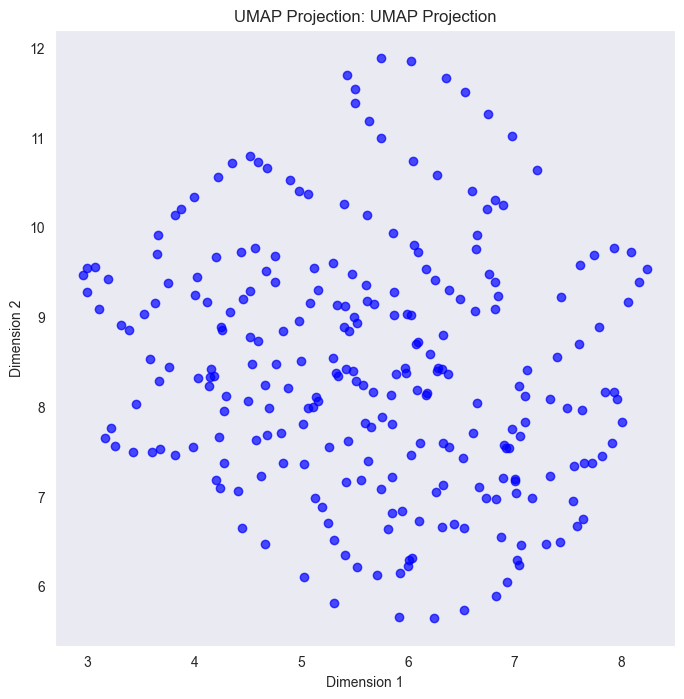

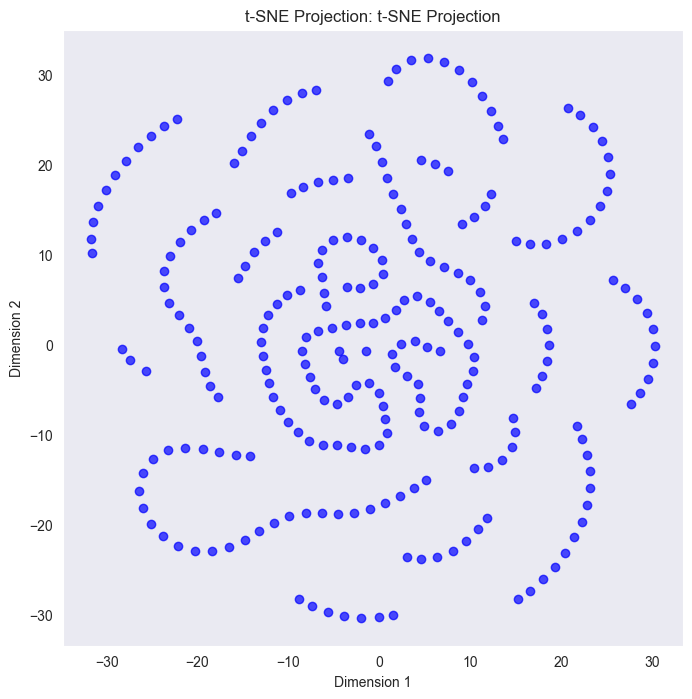

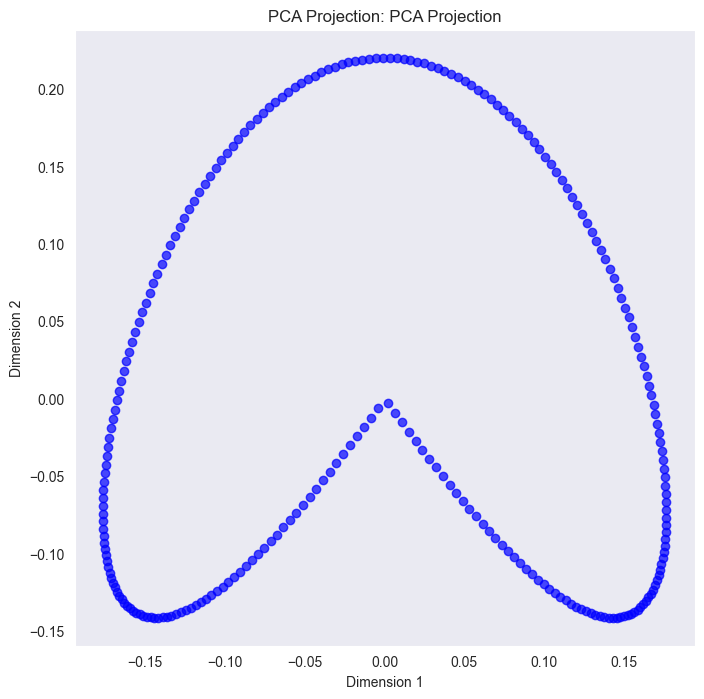

In [69]:
from sklearn.manifold import TSNE
from umap.umap_ import UMAP


# import pacmap  # Для PacMAP

def plot_dim_reduction(df, method, title, n_neighbors=15, min_dist=0.1):
    """Проекция с помощью t-SNE, UMAP, PacMAP или PCA."""
    if method == 'UMAP':
        reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    # elif method == 'PacMAP':
    #     reducer = pacmap.PaCMAP(n_neighbors=n_neighbors, random_state=42)
    elif method == 'PCA':
        reducer = PCA(n_components=2)
    else:
        raise ValueError("Method must be 'UMAP', 't-SNE', 'PacMAP', or 'PCA'")

    embedding = reducer.fit_transform(df)
    plt.figure(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', alpha=0.7)
    plt.title(f"{method} Projection: {title}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid()
    plt.show()


# Применение
plot_dim_reduction(df_256, method='UMAP', title="UMAP Projection")
plot_dim_reduction(df_256, method='t-SNE', title="t-SNE Projection")
# plot_dim_reduction(df_256, method='PacMAP', title="PacMAP Projection")
plot_dim_reduction(df_256, method='PCA', title="PCA Projection")

[4] Используя make_blobs, сгенерировать на основе номеров строк (параметр x), столбцов (параметр y) и значений («0», «1») ячеек датасета df_256 новый датасет
df_256v, в котором в каждой точке с центром (х,y) и дисперсией d (d – на выбор, в диапазоне от 5 до 20) сформировано по 10 случайных точек класса «1» или «0».

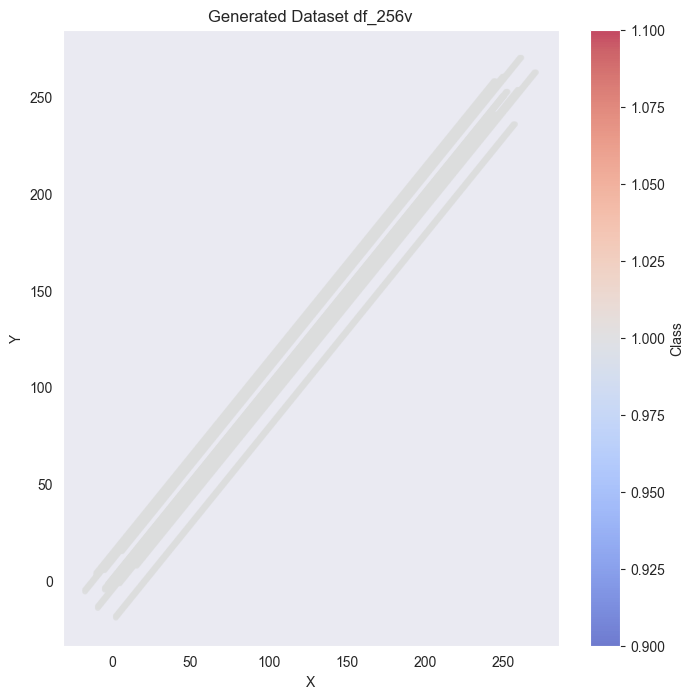

In [70]:
from sklearn.datasets import make_blobs


def generate_blob_dataset(df, points_per_cell=10, variance=10):
    rows, cols = df.shape
    data, labels = [], []

    for x in range(rows):
        for y in range(cols):
            label = df.iloc[x, y]
            if label == 1:
                # Генерируем точки вокруг центра (x, y)
                blob_data, blob_labels = make_blobs(
                    n_samples=points_per_cell, centers=[[x, y]], cluster_std=variance, random_state=42
                )
                data.append(blob_data)
                labels.append([label] * points_per_cell)

    # Объединяем всё в единый массив
    data = np.vstack(data)
    labels = np.concatenate(labels)
    return pd.DataFrame(data, columns=["X", "Y"]), labels


# Генерация датасета
df_256v, labels_256v = generate_blob_dataset(df_256, points_per_cell=10, variance=10)

# Визуализация датасета
plt.figure(figsize=(8, 8))
plt.scatter(df_256v["X"], df_256v["Y"], c=labels_256v, cmap="coolwarm", s=10, alpha=0.7)
plt.title("Generated Dataset df_256v")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Class")
plt.grid()
plt.show()

[5] Используя метод главных компонент (основанный на корреляциях), для датасета df_256v выполнить визуализации аналогично первым трем подпунктам пункта [2].

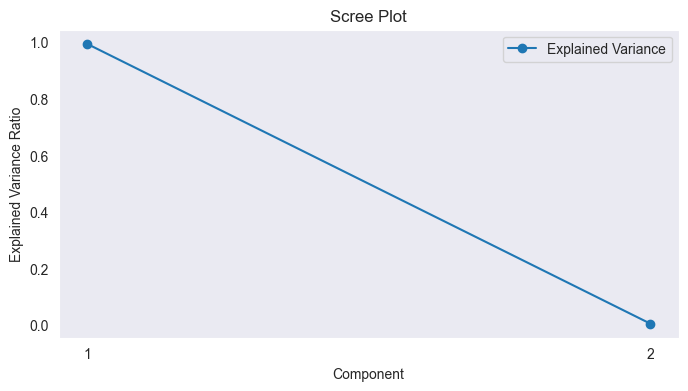

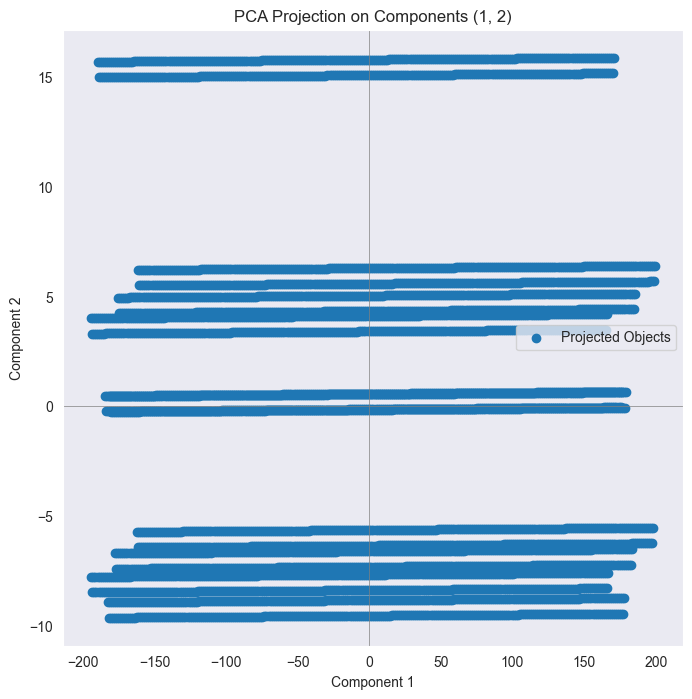

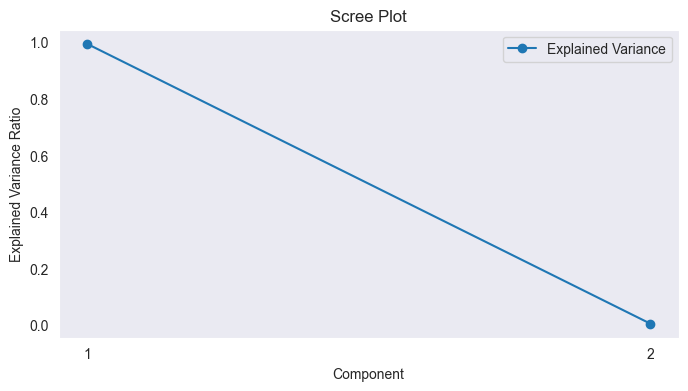

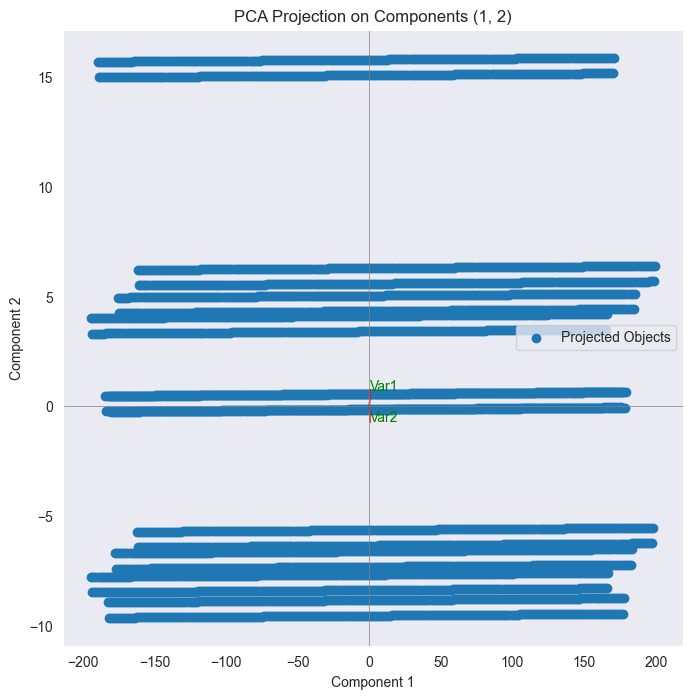

In [71]:
# PCA-анализ для df_256v
pca_analysis_and_plot(df_256v, n_components=2, show_vectors=False, component_range=(1, 2))
pca_analysis_and_plot(df_256v, n_components=2, show_vectors=True, component_range=(1, 2))

[6] Для датасета df_256v повторить пункт [3].

C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


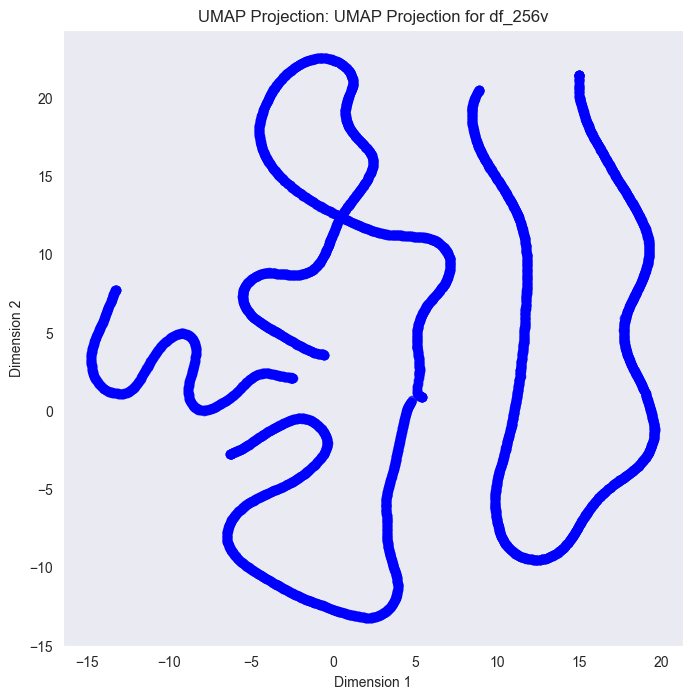

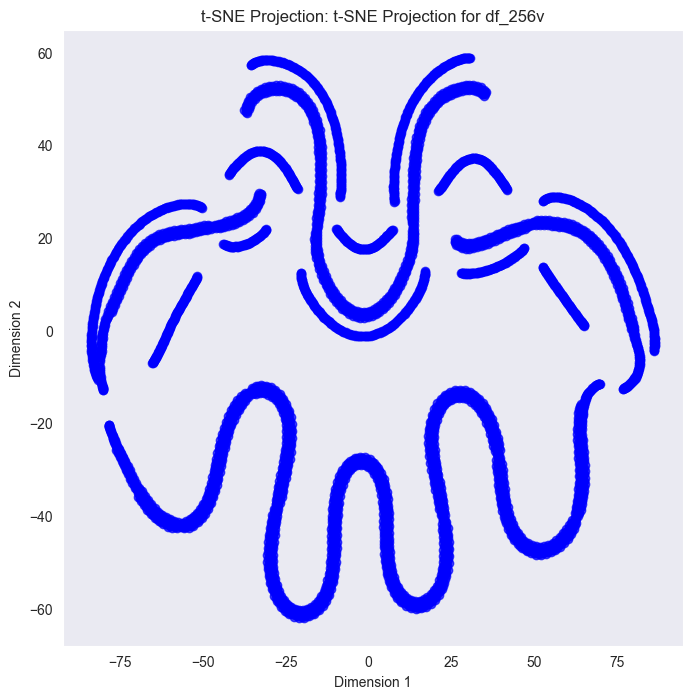

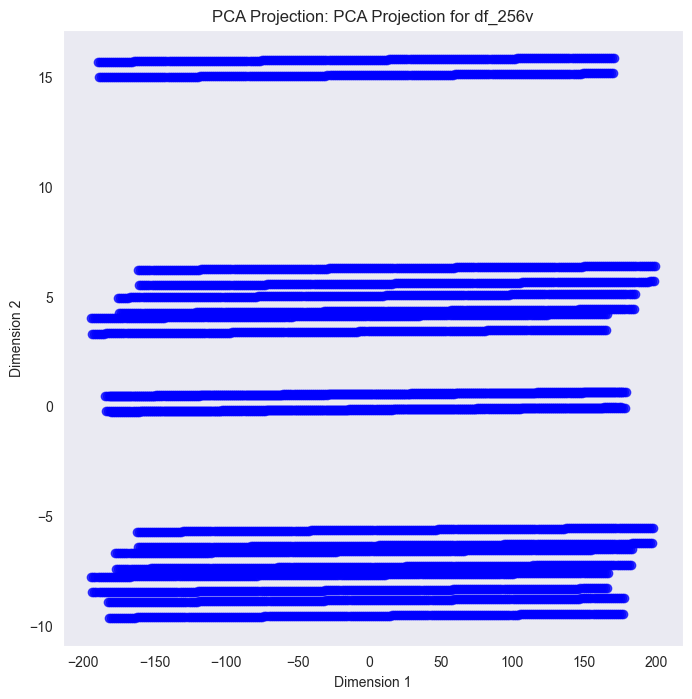

In [72]:
# Визуализация df_256v
plot_dim_reduction(df_256v, method='UMAP', title="UMAP Projection for df_256v")
plot_dim_reduction(df_256v, method='t-SNE', title="t-SNE Projection for df_256v")
plot_dim_reduction(df_256v, method='PCA', title="PCA Projection for df_256v")

[7] Взять датасет с Kaggle, в котором есть >=10 переменных, >=10000 объектов и несколько классов. Для каждого датасета не забываем повторять шаги с задания
1 - ключевые характеристики датасета, корреляции, визуализация на всех парах var.

C:\Users\Makovey\AppData\Local\Temp\ipykernel_8012\3208224289.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kaggle['Gender'] = df_kaggle['Gender'].replace({'Male': 1, 'Female': 0})


Ключевые характеристики датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Session_Duration (hours)       973 non-null    float64
 5   Calories_Burned                973 non-null    float64
 6   Fat_Percentage                 973 non-null    float64
 7   Water_Intake (liters)          973 non-null    float64
 8   Workout_Frequency (days/week)  973 non-null    int64  
 9   Experience_Level               973 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 76.1 KB
None
              Age      Gender  Weight (kg)  Height (m)  \
count  973.000000  973.0000

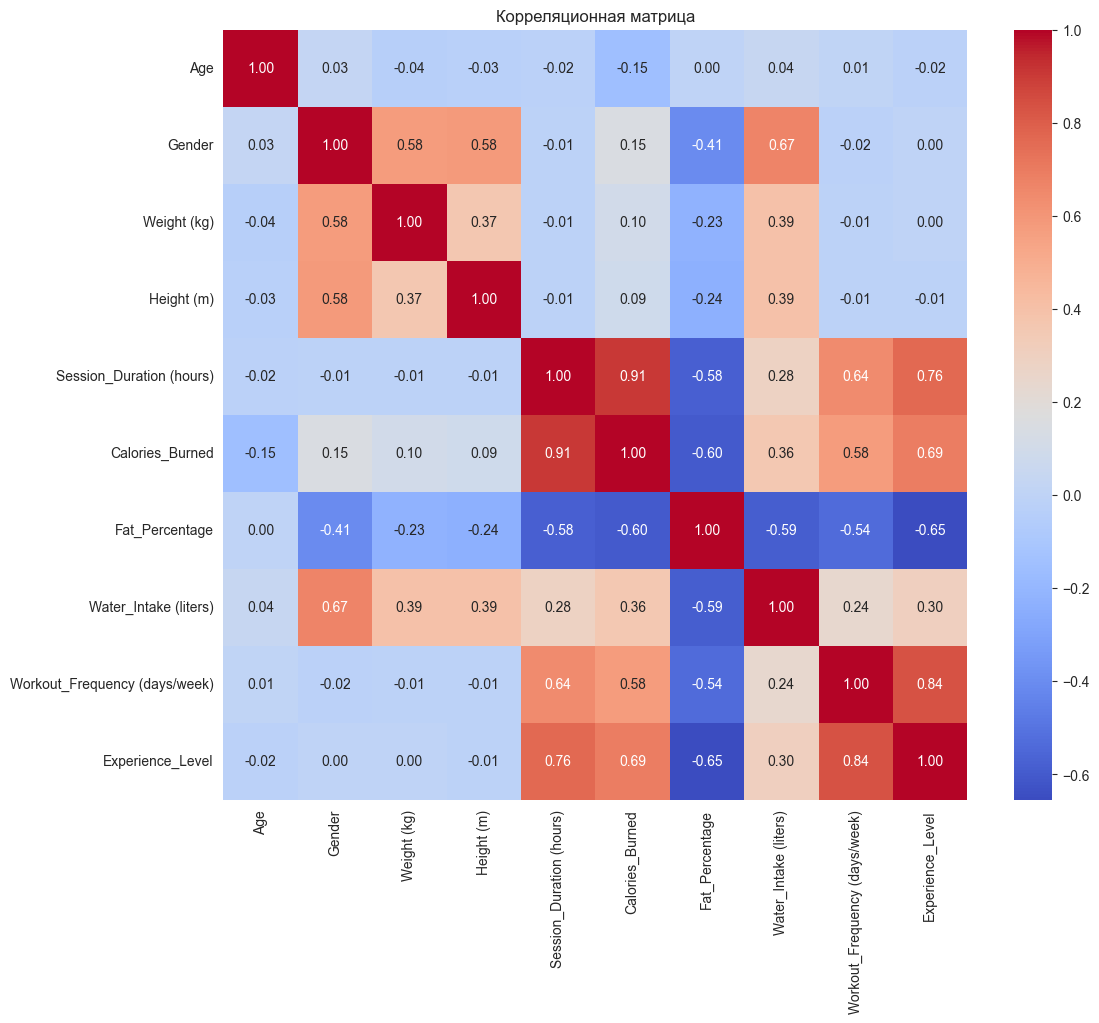

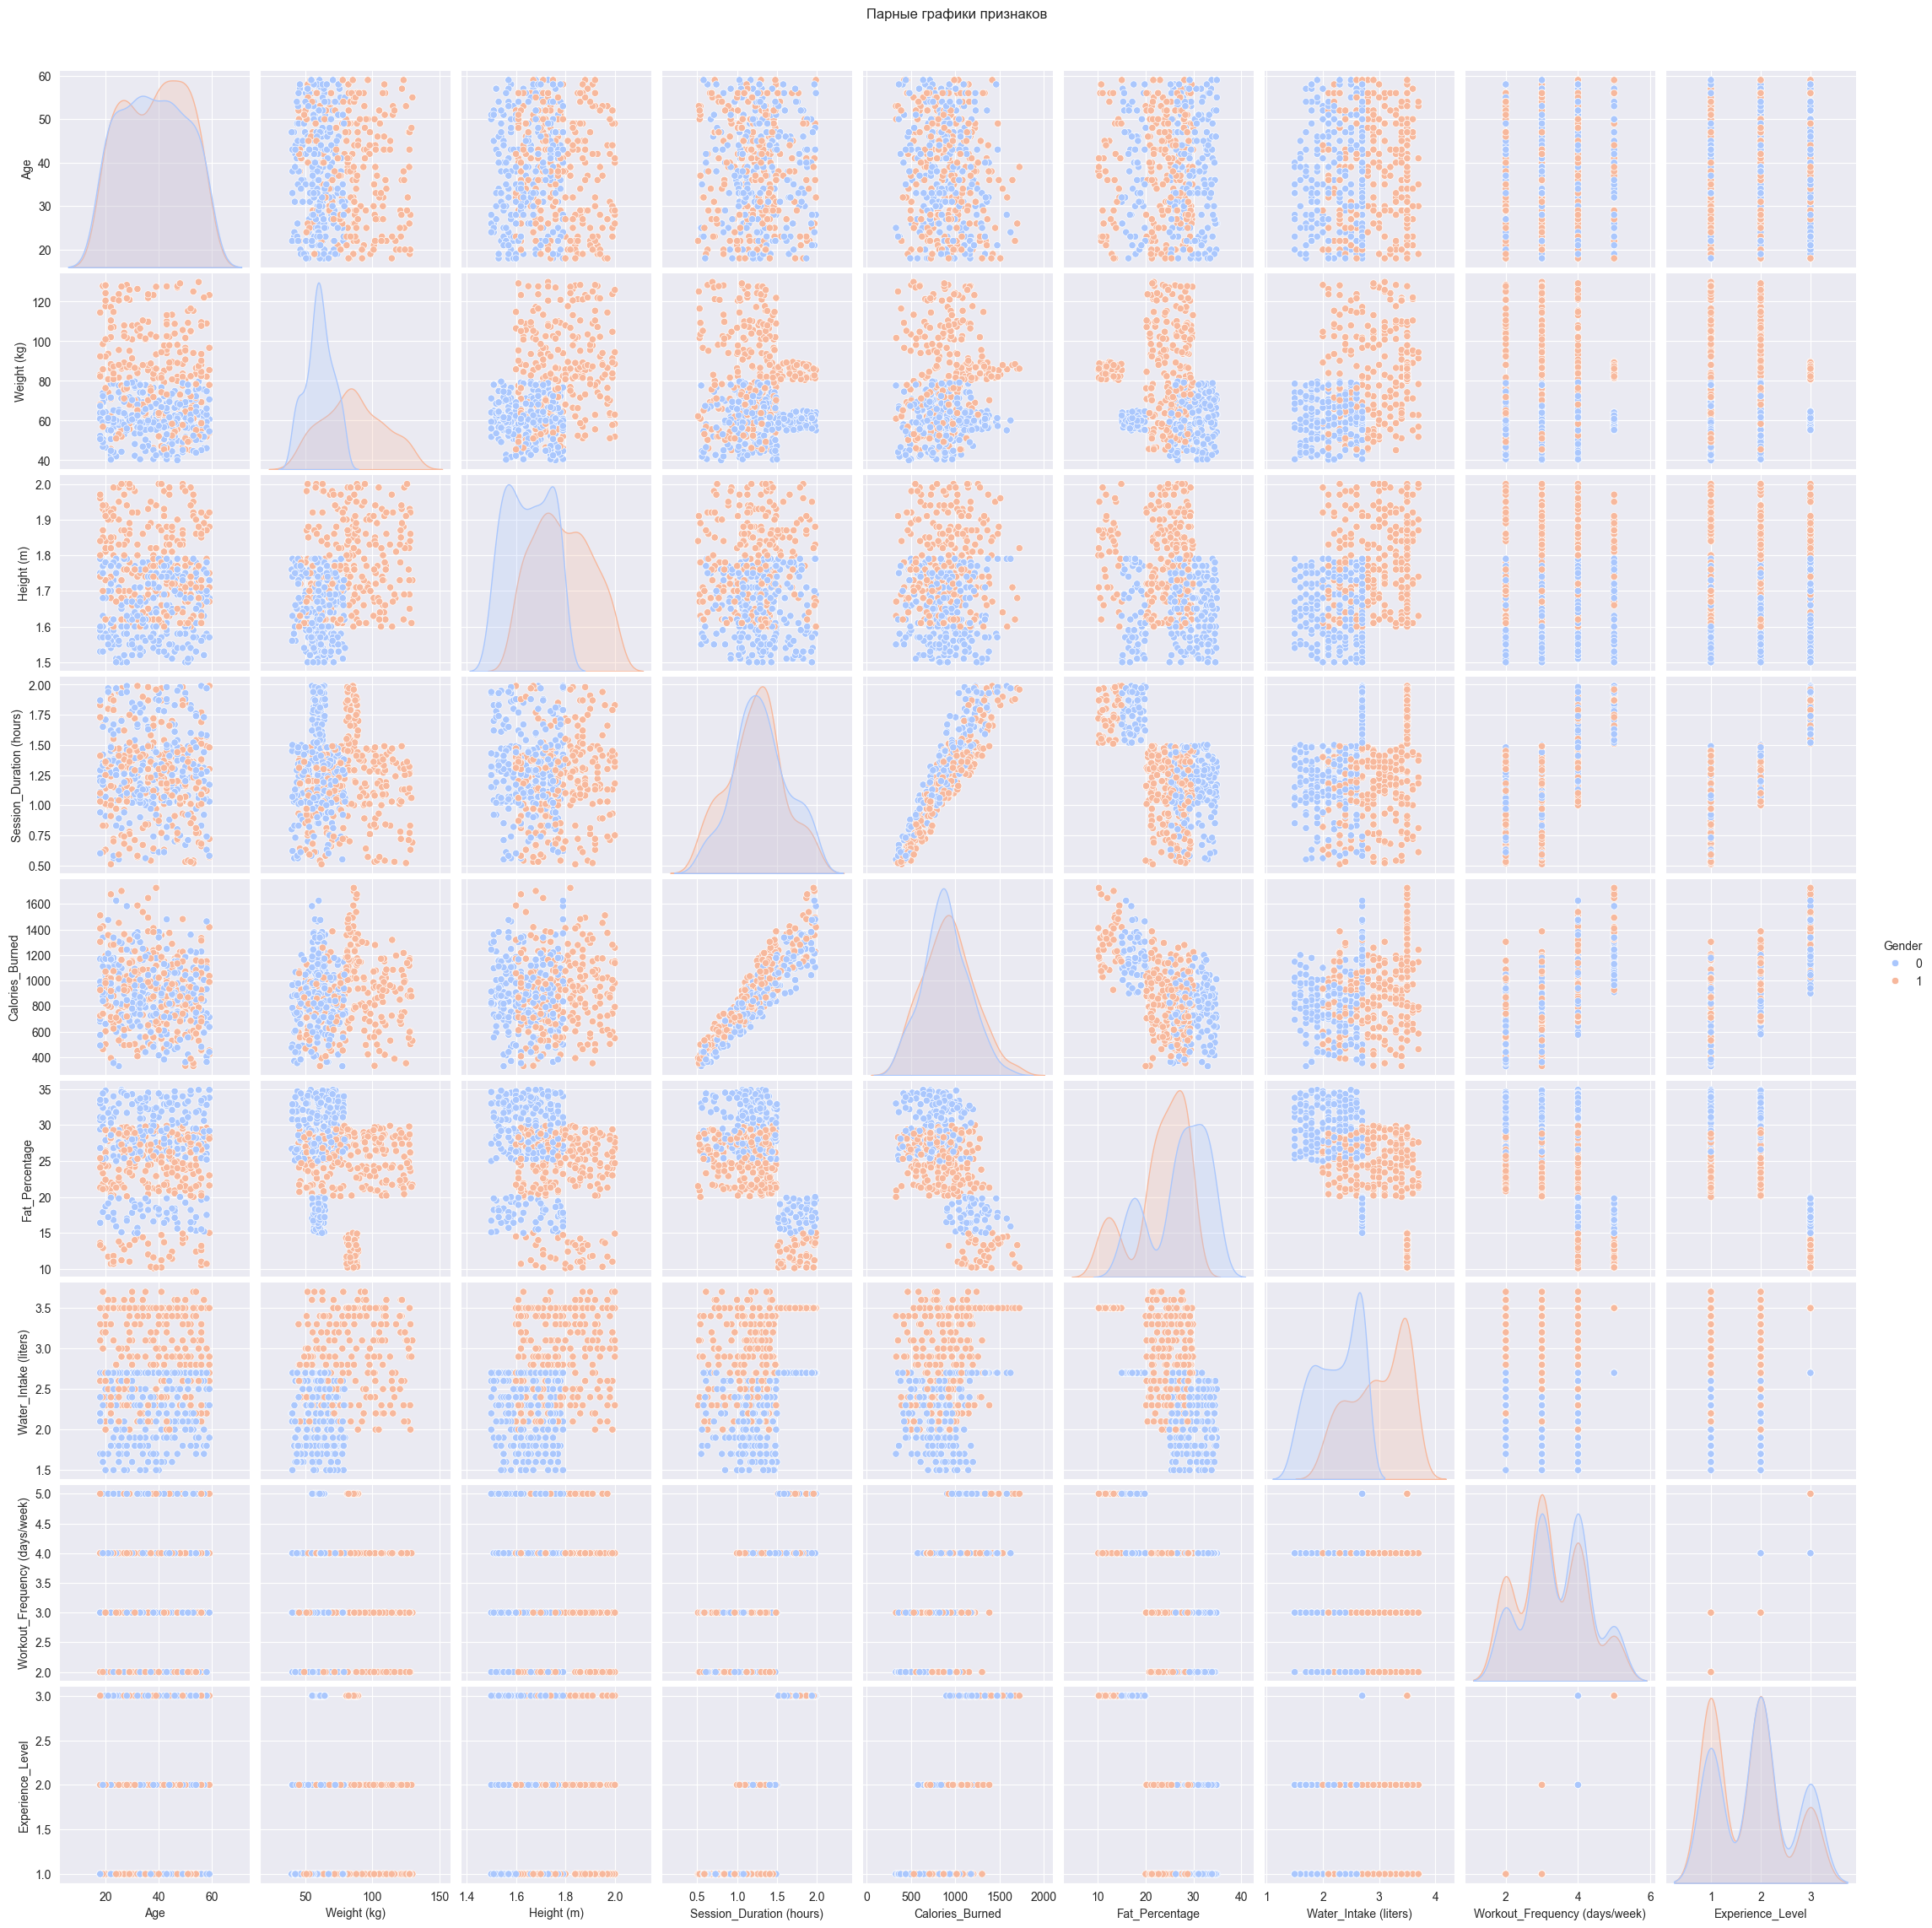

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Загрузка датасета (замените путь на реальный путь или URL)
# dataset_path = "Student Depression Dataset.csv"  # Укажите путь к файлу
dataset_path = "gym_members_exercise_tracking.csv"  # Укажите путь к файлу
df_kaggle = pd.read_csv(dataset_path)

# Удаление некоторых категорий
df_kaggle = df_kaggle.drop(columns=['Workout_Type', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'BMI'])

# Замена значений в колонке Gender: Male на 1, Female на 0
df_kaggle['Gender'] = df_kaggle['Gender'].replace({'Male': 1, 'Female': 0})

# Изучение ключевых характеристик
print("Ключевые характеристики датасета:")
print(df_kaggle.info())
print(df_kaggle.describe())

# Обработка пропусков
df_kaggle.dropna(inplace=True)

# Корреляционная матрица
plt.figure(figsize=(12, 10))
sns.heatmap(df_kaggle.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Визуализация всех пар переменных
sns.pairplot(df_kaggle.sample(500), diag_kind="kde", palette="coolwarm",
             hue='Gender')  # Ограничим 500 объектов для скорости
plt.suptitle("Парные графики признаков", y=1.02)
plt.show()

[8] Используя метод главных компонент (основанный на корреляциях), для датасета из пункта [7] выполнить визуализации аналогично первым трем подпунктам пункта [2]. Определить различными способами (метод Кайзера, метод ломанной трости), сколько компонент необходимо оставлять для регрессионной модели.

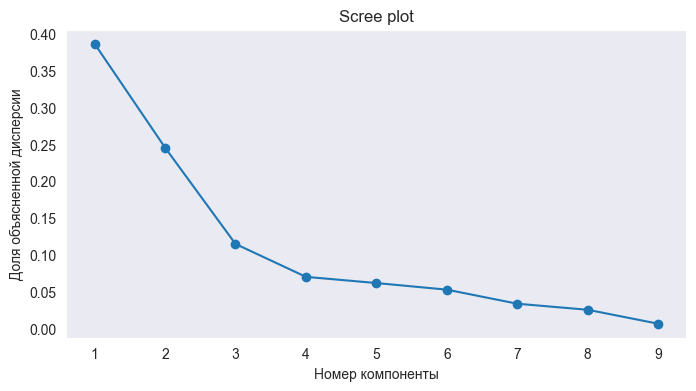

Количество компонент по методу Кайзера: 3


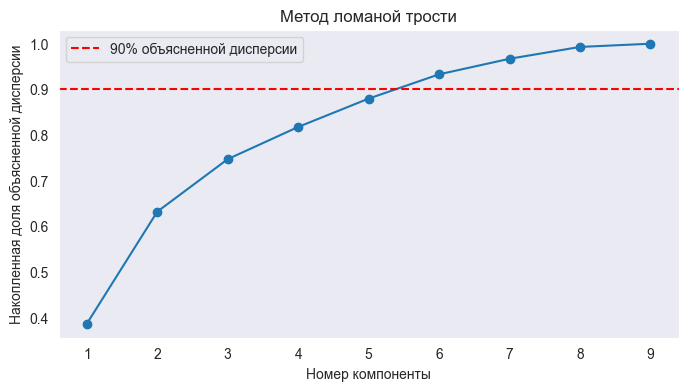

Оптимальное количество компонент (90% дисперсии): 6


In [74]:
# Стандартизация данных
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kaggle.iloc[:, :-1])  # Без класса

# PCA
pca = PCA()
pca_result = pca.fit(df_scaled)

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree plot")
plt.xlabel("Номер компоненты")
plt.ylabel("Доля объясненной дисперсии")
plt.grid()
plt.show()

# Определение количества компонент методом Кайзера (собственное значение > 1)
kaiser_components = sum(pca.explained_variance_ > 1)
print(f"Количество компонент по методу Кайзера: {kaiser_components}")

# Метод ломаной трости (находим точку "излома")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% объясненной дисперсии")
plt.title("Метод ломаной трости")
plt.xlabel("Номер компоненты")
plt.ylabel("Накопленная доля объясненной дисперсии")
plt.legend()
plt.grid()
plt.show()

# Оптимальное количество компонент
optimal_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Оптимальное количество компонент (90% дисперсии): {optimal_components}")

[9] Для датасета из пункта [7] повторить пункт [3].

C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


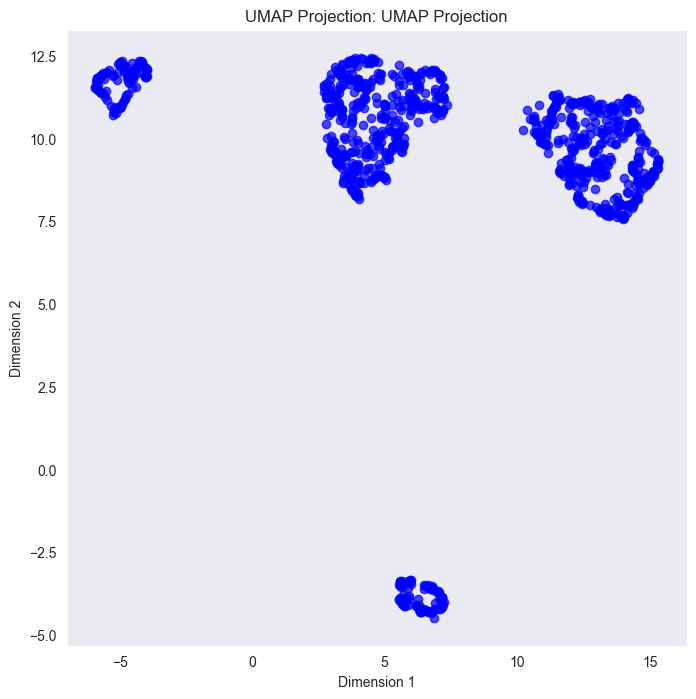

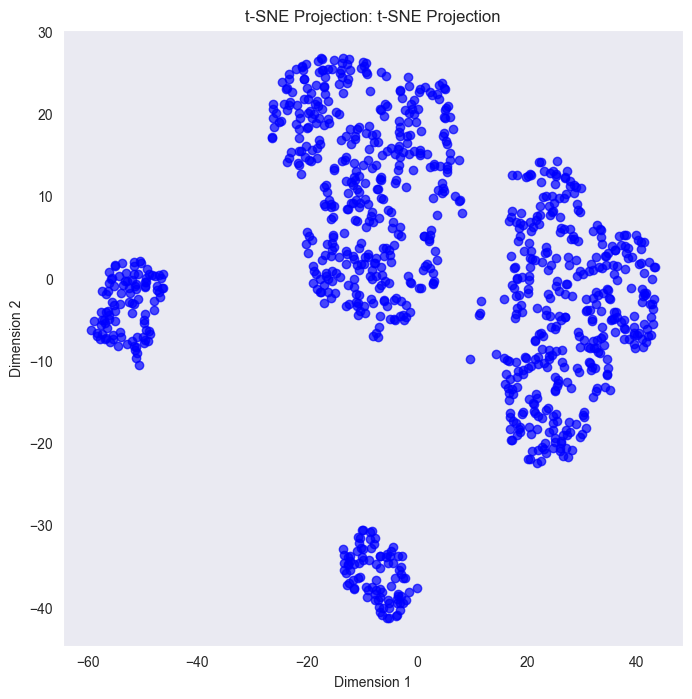

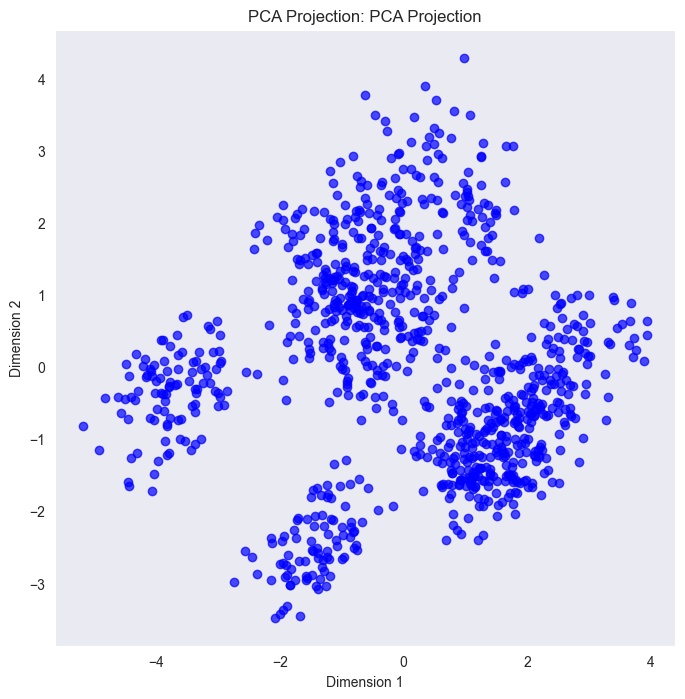

In [75]:
# Визуализация после PCA
df_pca = pd.DataFrame(pca.transform(df_scaled)[:, :optimal_components],
                      columns=[f"PC{i + 1}" for i in range(optimal_components)])

# Визуализация
plot_dim_reduction(df_pca, method='UMAP', title="UMAP Projection")
plot_dim_reduction(df_pca, method='t-SNE', title="t-SNE Projection")
plot_dim_reduction(df_pca, method='PCA', title="PCA Projection")